In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd

path = "/media/sarah/storage/Data/Douglas Bakkum/sampledata/"
file_name = path+'footprint.mat'
map2_name = "/media/sarah/storage/Data/Douglas Bakkum/transformed.mat"
mat_contents = sio.loadmat(file_name)
map2_image = sio.loadmat(map2_name)

In [3]:
# Load electrode coordinates
n_elec = 206
x_coord = mat_contents['footprint'][0][0][6][0]
y_coord = mat_contents['footprint'][0][0][7][0]

# Load average traces
n_samples = 101
n_traces = mat_contents['footprint'][0][0][5][0]
tot_traces = mat_contents['footprint'][0][0][4]

In [4]:
# Load MAP2 image
x_start = int(map2_image['t'][0][0][1])
x_end = int(map2_image['t'][0][0][2])
y_start = int(map2_image['t'][0][0][3])
y_end = int(map2_image['t'][0][0][4])
map2_intensity = map2_image['t'][0][0][0]

<IPython.core.display.Javascript object>


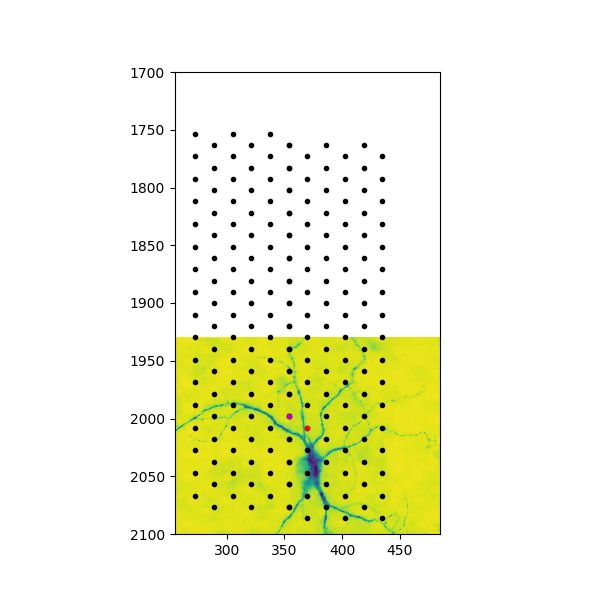

In [5]:
% matplotlib notebook

plt.figure(figsize=(6,6))
plt.imshow(map2_intensity, extent=[x_start,x_end,y_end, y_start])
plt.plot(x_coord, y_coord, 'k.')
plt.plot(x_coord[191], y_coord[191], 'r.')
plt.plot(x_coord[43], y_coord[43], 'm.')
plt.ylim((2100, 1700))
plt.xlim((x_start,x_end))

plt.show()

In [6]:
# Sorting the data

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, n_elec)]

# Sorting in x-dir

sorted_xind = np.argsort(x_coord)

# Sorting in y-dir

sorted_yind = np.zeros((n_elec-2))

for i in range(12):
    xx = y_coord[sorted_xind][17*i:17*(i+1)]
    #print xx
    #print x_coord[sorted_xind][17*i:17*(i+1)]
    sort_xx = np.argsort(xx) + int(17*i)
    #print sort_xx
    #print y_coord[sorted_xind][sort_xx]
    sorted_yind[17*i:17*(i+1)] = sort_xx

sorted_yind = sorted_yind.astype(int)

In [7]:
# Sort all the data

sorted_xcoord = x_coord[sorted_xind][sorted_yind]
sorted_ycoord = y_coord[sorted_xind][sorted_yind]

sorted_ntraces = n_traces[sorted_xind][sorted_yind]
sorted_tottraces = tot_traces[:,sorted_xind][:,sorted_yind]

In [8]:
# Average the two columns that correspond to the same electrode

sorted_xcoord = np.delete(sorted_xcoord, np.linspace(6*17-1,7*17-1,18, dtype=int))

sorted_ycoord[5*17:6*17] = sorted_ycoord[17:2*17]
sorted_ycoord = np.delete(sorted_ycoord, np.linspace(6*17-1,7*17-1,18, dtype=int))

sorted_tottraces = np.delete(sorted_tottraces, np.linspace(6*17-1,7*17-1,18, dtype=int), axis=1)

<IPython.core.display.Javascript object>


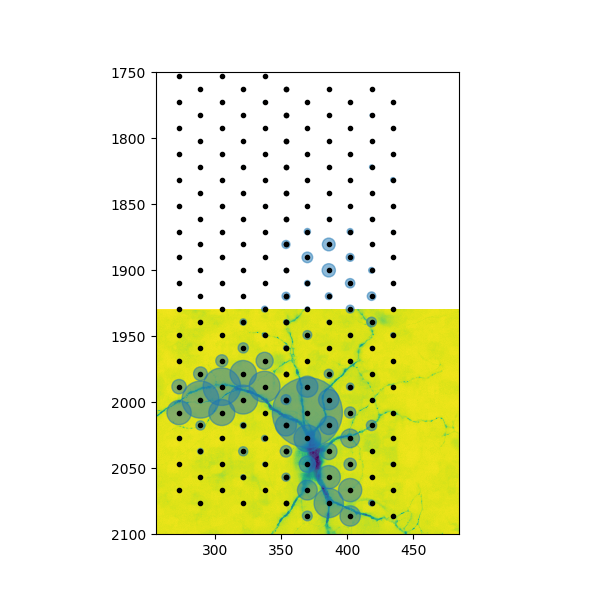

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(map2_intensity, extent=[x_start,x_end,y_end, y_start])
plt.plot(x_coord, y_coord, 'k.')
plt.scatter(sorted_xcoord, sorted_ycoord, sorted_tottraces[50,:]**2, alpha=0.5)
plt.ylim((2100, 1750))
plt.xlim((x_start,x_end))

plt.show()

plt.show()

In [8]:
# Get full x and y coords

full_ycoord = np.zeros(35)
full_ycoord[:-1:2] = sorted_ycoord[0:17]
full_ycoord[1::2] = sorted_ycoord[17:34]
full_ycoord[-1] = sorted_ycoord[-1]

full_xcoord = sorted_xcoord[::17]
#x_bis = np.zeros(2*len(full_xcoord)-1)

#for i in range(len(full_xcoord)-1):
    #x_bis[2*i] = full_xcoord[i]
    #x_bis[2*i+1] = (full_xcoord[i+1]-full_xcoord[i])/2 + full_xcoord[i]
    
#x_bis[20] = full_xcoord[10]
#print full_xcoord
#print len(x_bis)

In [9]:
# Interpolate V on a rectangular grid at a time

ny = 17

# Data points
x_d = sorted_xcoord
y_d = sorted_ycoord

# Define the grid
x_g = full_xcoord
y_g = full_ycoord
X_g, Y_g = np.meshgrid(x_g, y_g)

# Grid the data.
sample = 45
V_d = sorted_tottraces[sample,:]

V_interp = griddata((x_d, y_d), V_d, (X_g, Y_g), method='cubic')

#V_df_interp = pd.DataFrame(V_interp)

In [10]:
V_interp[0:3]

array([[-0.05311254,  0.60876417,  0.00541189, -0.72744648, -1.29841907,
                nan,         nan,         nan,         nan,         nan,
                nan],
       [-0.89532819,  1.14067675, -0.19361606,  0.72570114, -0.36461126,
         0.59927204,  0.32363964, -0.63993665, -0.25719883, -0.23007382,
                nan],
       [-1.57141334, -0.21897503, -0.814883  ,  0.13166763, -0.27873861,
        -0.75174237,  1.53527755,  1.43794965,  1.90123593, -0.46049816,
         0.6736847 ]])

In [11]:
# Suppressing the lines that contain nan

ne = 330

V_no_nan = V_interp[2:32,:]
V_no_nan_1d = V_no_nan.reshape(ne)

# creating an array of y position corresponding to V_no_nan

y_no_nan = np.zeros((30,11))
x_no_nan = np.zeros((30,11))

for i in range(11):
    y_no_nan[:,i] = full_ycoord[2:32]
    x_no_nan[:,i] = x_g[i]
    
y_no_nan_1d = y_no_nan.T.reshape(ne)
x_no_nan_1d = x_no_nan.T.reshape(ne)

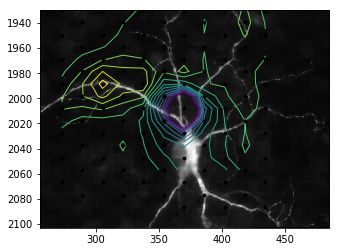

In [12]:
# PLotting the contour lines

x_m = x_no_nan[0,:]
y_m = y_no_nan[:,0]
X, Y = np.meshgrid(x_m, y_m)

Z = V_no_nan
levels = np.linspace(-100,100,20)

plt.figure()
plt.plot(x_coord, y_coord, 'k.')
CS1bis = plt.contour(X,Y,Z, levels=levels,linewidths=1,  linestyles='solid')
plt.imshow(map2_intensity, extent=[x_start,x_end,y_end, y_start], cmap='Greys')
#clabel(CS1bis, inline=1, fontsize=contour_label_size, fmt='%1.0f')
#plt.ylim(2100,1750)

plt.show()

In [13]:
# Find theta

deltay = full_ycoord[1]-full_ycoord[0]
deltax = full_xcoord[1]-full_xcoord[0]
hyp = np.sqrt(deltax**2+deltay**2)
theta = np.arcsin(deltax/hyp)

print deltay, deltax, theta

9.795 16.2 1.02697963889


In [22]:
# Electric field

dx = np.array([-deltax,0,deltax, deltax, deltax, 0,-deltax,-deltax])
dy = np.array([-deltay, -deltay, -deltay, 0, deltay, deltay, deltay,0])
coeffx = np.array([np.sin(theta), 0, -np.sin(theta), -1, -np.sin(theta), 0, np.sin(theta), 1])
coeffy = np.array([-np.cos(theta), -1, -np.cos(theta), 0, np.cos(theta), 1, np.cos(theta), 0])

def field_on_grid(pos, xcoord, ycoord, V):
    xp = [xcoord[pos], ycoord[pos]]
    xc = xcoord.astype(int)
    yc = ycoord.astype(int)
    print xp
    ex = 0
    ey = 0
    
    for i in range(8):
        print i
        print 'position', xp[0]+dx[i], xp[1]+dy[i]
        pos_i = np.where((xc == int(xp[0]+dx[i])) & (yc == int(xp[1]+dy[i])))[0]
        print 'index', pos_i
        dri = np.sqrt(dx[i]**2+dy[i]**2)
        dVi = V[pos] - V[pos_i] 
        Exi = (dVi/dri)*coeffx[i]
        Eyi = (dVi/dri)*coeffy[i]
        print 'field comp', Exi, Eyi 
        
        ex += Exi
        ey += Eyi
        print ex, ey
    
    return [ex, ey]

In [23]:
nel  = 5

Ex = np.zeros((5))
Ey = np.zeros((5))

for i in range(5):
    e = field_on_grid(i, x_no_nan_1d, y_no_nan_1d, V_no_nan_1d)
    print 'total field', e, e[0], e[1]
    Ex[i] = e[0]
    Ey[i] = e[1]

[272.69999999999999, 1772.9169999999999]
0
position 256.5 1763.122
index []
field comp [] []
[] []
1
position 272.7 1763.122
index []
field comp [] []
[] []
2
position 288.9 1763.122
index []
field comp [] []
[] []
3
position 288.9 1772.917
index [30]
field comp [ 0.05810482] [-0.]
[] []
4
position 288.9 1782.712
index [31]
field comp [-0.03474894] [ 0.02101024]
[] []
5
position 272.7 1782.712
index [1]
field comp [-0.] [-0.13807436]
[] []
6
position 256.5 1782.712
index []
field comp [] []
[] []
7
position 256.5 1772.917
index []
field comp [] []
[] []
total field [array([], dtype=float64), array([], dtype=float64)] [] []


ValueError: setting an array element with a sequence.

In [254]:
print x_no_nan[0, :11]
print y_no_nan

[ 272.7  288.9  305.1  321.3  337.5  353.7  369.9  386.1  402.3  418.5
  434.7]
[[ 1772.917  1772.917  1772.917  1772.917  1772.917  1772.917  1772.917
   1772.917  1772.917  1772.917  1772.917]
 [ 1782.711  1782.711  1782.711  1782.711  1782.711  1782.711  1782.711
   1782.711  1782.711  1782.711  1782.711]
 [ 1792.505  1792.505  1792.505  1792.505  1792.505  1792.505  1792.505
   1792.505  1792.505  1792.505  1792.505]
 [ 1802.299  1802.299  1802.299  1802.299  1802.299  1802.299  1802.299
   1802.299  1802.299  1802.299  1802.299]
 [ 1812.093  1812.093  1812.093  1812.093  1812.093  1812.093  1812.093
   1812.093  1812.093  1812.093  1812.093]
 [ 1821.887  1821.887  1821.887  1821.887  1821.887  1821.887  1821.887
   1821.887  1821.887  1821.887  1821.887]
 [ 1831.681  1831.681  1831.681  1831.681  1831.681  1831.681  1831.681
   1831.681  1831.681  1831.681  1831.681]
 [ 1841.476  1841.476  1841.476  1841.476  1841.476  1841.476  1841.476
   1841.476  1841.476  1841.476  1841.476]


<IPython.core.display.Javascript object>


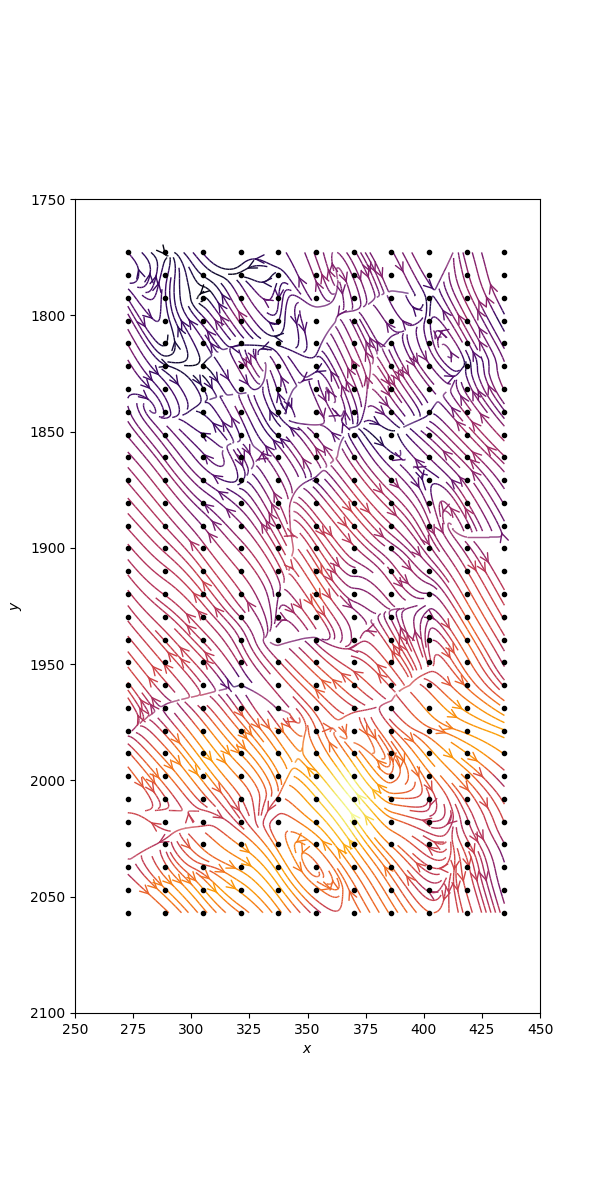

In [166]:
# Grid of x, y points

Ex = Ex.reshape((30,11))
Ey = Ey.reshape((30,11))

fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(111)

color = np.log(np.hypot(Ex, Ey))
im = ax.streamplot(X, Y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=3, arrowstyle='->', arrowsize=1.5)
ax.plot(x_no_nan_1d, y_no_nan_1d, 'k.')
#ax.imshow(map2_intensity, extent=[x_start,x_end,  y_end,y_start], cmap='binary', alpha=0.5)
#CS1bis = plt.contour(X,Y,Z, linewidths=1, colors='b', linestyles='solid')
#ax.contourf(x, y, pot, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_aspect('equal')
plt.ylim((2100, 1750))
plt.xlim((250, 450))
#fig.colorbar(im.lines)

plt.show()

<IPython.core.display.Javascript object>


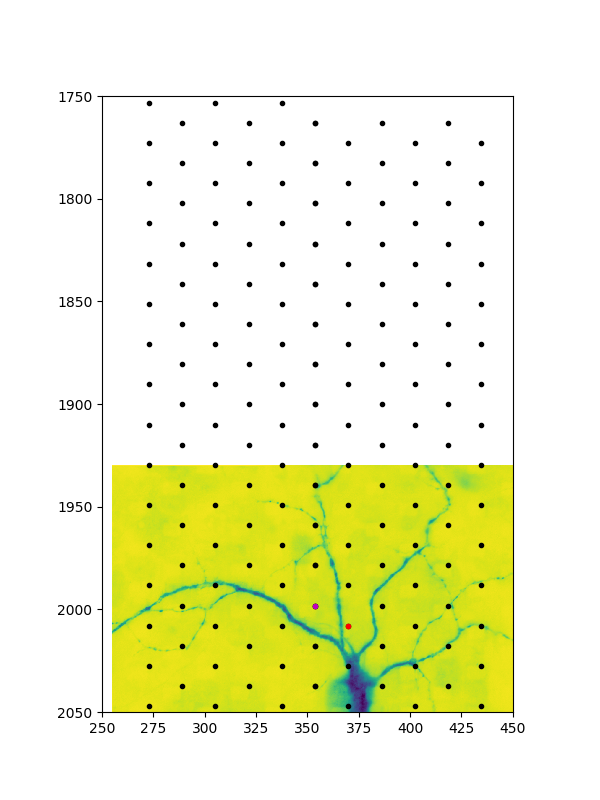

In [108]:
plt.figure(figsize=(6,8))
plt.imshow(map2_intensity, extent=[x_start,x_end,y_end, y_start])
plt.plot(x_coord, y_coord, 'k.')
plt.plot(x_coord[191], y_coord[191], 'r.')
plt.plot(x_coord[43], y_coord[43], 'm.')
plt.ylim((2050, 1750))
plt.xlim((250, 450))
#plt.xlim((x_start,x_end))

plt.show()

<IPython.core.display.Javascript object>


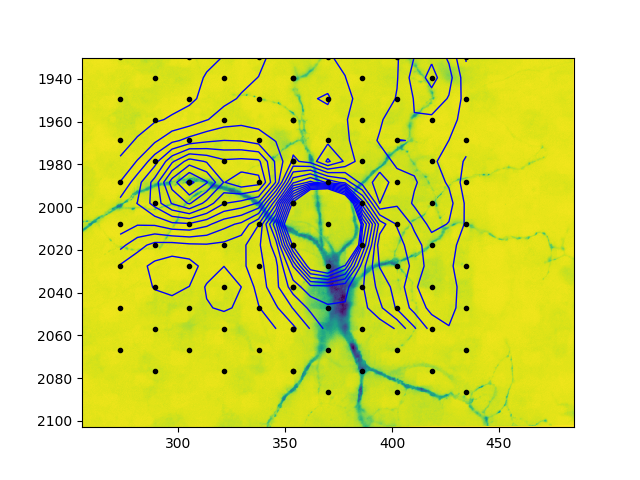

In [149]:
Z = V_no_nan
levels = np.linspace(-50,50,20)

plt.figure()
#CS1 = plt.contourf(X,Y,Z, cmap=cmap)
plt.plot(x_coord, y_coord, 'k.')
CS1bis = plt.contour(X,Y,Z, levels=levels,linewidths=1, colors='b', linestyles='solid')
plt.imshow(map2_intensity, extent=[x_start,x_end,y_end, y_start])
#clabel(CS1bis, inline=1, fontsize=contour_label_size, fmt='%1.0f')
#plt.ylim(2100,1750)

plt.show()

In [ ]:
# Arrrange data on a grid

arranged_ycoord = np.zeros((35,11))
arranged_data = np.zeros((35,11,101))

for i in range(11):
    arranged_ycoord[:,i] = full_ycoord
    
for i in range(3):
    data_col1 = sorted_tottraces[:, 17*2*i:17*(2*i+1)].T
    arranged_data[:-1:2, 2*i,:] = data_col1
    data_col2 = sorted_tottraces[:, 17*(2*i+1):17*2*(i+1)].T
    arranged_data[1::2, 2*i+1,:] = data_col2
    #print arranged_ycoord
    #arranged_ycoord[1::2, 2*i] = sorted_ycoord[0:17*i:2]
    
for i in range(2):
    data_col3 = sorted_tottraces[:, 17*(2*i+6):17*(2*i+7)].T
    arranged_data[2::2, 2*i+6, :] = data_col3
    data_col4 = sorted_tottraces[:, 17*(2*i+6+1):17*(2*i+7+1)].T
    arranged_data[1::2, 2*i+6+1, :] = data_col4
    
arranged_data[2:-1:2, 10, :] = sorted_tottraces[:, 17*10:17*11].T

data_df = pd.DataFrame(arranged_data[:,:,45])
data_df

#print full_ycoord

In [299]:
coeffx

array([ 0.85574014,  0.        , -0.85574014, -1.        , -0.85574014,
        0.        ,  0.85574014,  1.        ])